<div style="background:#ffe5e8; padding:15px; border-radius:10px; font-size:18px;">

## 📄 Customer Segmentation Using RFM & Clustering 

### 📌 Project Overview  
This project focuses on performing **Customer Segmentation** using **RFM Analysis** (Recency, Frequency, Monetary) combined with unsupervised machine learning algorithms such as **KMeans** and **Gaussian Mixture Models (GMM)**.

The goal is to help a business understand customer behavior and divide customers into meaningful groups so the company can make **data-driven marketing and business decisions**.

</div>


<div style="background:#ffe5e8; padding:15px; border-radius:10px; font-size:18px;">

## 🔍 <b>Business Problem</b>

Businesses often treat all customers the same — which leads to:<br>
- Unnecessary marketing costs <br>
- Poor customer retention <br>
- Missed opportunities to upsell or re-engage valuable customers <br><br>

To grow profitably, a company must identify:<br>
- Who are the most valuable customers? <br>
- Which customers are inactive? <br>
- Which customers should receive discounts or offers? <br>
- Where should marketing budget be focused? <br><br>

Customer segmentation solves these problems.

</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score
from sklearn.metrics.pairwise import rbf_kernel
import warnings
from IPython.display import Markdown, HTML


In [2]:
HTML('<style> body { background-color: #f4f8ff !important; } .jp-Notebook { background-color: #f4f8ff !important; } </style>')
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\Kaushal\Desktop\Ecom_customer_segmentation\data.csv", encoding='ISO-8859-1')

In [4]:
#Different encodings interpret bytes differently —
#utf-8 couldn’t understand certain bytes (like 0xa3, which is £ in ISO-8859-1).
#By switching to the correct encoding, pandas can decode them properly.

<div style="background:#ffe5e8; padding:15px; border-radius:10px; font-size:18px;">

## 🧹 <b>Data Preprocessing Steps</b>

To prepare the dataset for analysis, I performed:

### ✔ <b>Data Cleaning</b>
- Removed duplicates <br>
- Fixed missing values <br>
- Handled incorrect dates <br>
- Corrected datatypes <br><br>
</div>


In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df[df['Quantity'] > 10000].shape

(3, 8)

In [10]:
df[df['Quantity'] > 10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12-09-2011 09:15,2.08,16446.0,United Kingdom


In [11]:
df[df['UnitPrice'] < 0]#.shape

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,08-12-2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,08-12-2011 14:52,-11062.06,NaN,United Kingdom


In [12]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
#df[(df['Quantity'] <= 0) | (df['UnitPrice'] <= 0)]
#to check 

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed', dayfirst=True)
# format='mixed' → allows multiple date formats
# dayfirst=True → correctly interprets dates like "08-12-2011" (12 August)

#### Remove Rows With Description Like “Adjust”, “Damaged”, “Sample”

In [15]:
df = df[~df['Description'].str.contains("ADJUST|damaged|sample", case=False, na=False)]

#### Remove Duplicate Rows

In [16]:
df.duplicated().sum()

5226

In [17]:
df.drop_duplicates(inplace=True)

#### Remove CustomerID with value "NaN"

In [18]:
df['CustomerID'].isna().sum()
#df[df['CustomerID'].isna()]


132183

In [19]:
df = df.dropna(subset=['CustomerID'])
# dropna() = “drop missing values”   
# subset=['CustomerID'] = “look for missing values only in CustomerID column”

## Insights on Data

In [20]:
df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head(10)

Country
United Kingdom    3920
Germany             94
France              87
Spain               30
Belgium             25
Switzerland         21
Portugal            19
Italy               14
Finland             12
Austria             11
Name: CustomerID, dtype: int64

In [21]:
df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

Country
United Kingdom    4241305
Netherlands        200361
EIRE               140133
Germany            119154
France             111428
Australia           83891
Sweden              36078
Switzerland         30082
Spain               27933
Japan               26016
Name: Quantity, dtype: int64

In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed', dayfirst=True)
# format='mixed' → allows multiple date formats
# dayfirst=True → correctly interprets dates like "08-12-2011" (12 August)

<div style="background:#ffe5e8; padding:15px; border-radius:10px; font-size:18px;">


# ✔ <b>Feature Engineering</b>
- Calculated Recency (days since last purchase) <br>
- Calculated Frequency (total transactions) <br>
- Calculated Monetary (total spending amount) <br>
- Standardized / normalized features for clustering <br><br>


## 📊 <b>What Is RFM Analysis?</b>

RFM stands for: <br><br>

### **Recency** – How recently the customer purchased  
### **Frequency** – How often they purchase  
### **Monetary** – How much they spend  

These three factors accurately represent customer value and purchase behavior.  
<br>

## ⭐ <b>Why RFM?</b>

- Easy to calculate <br>
- Simple for business teams to understand <br>
- Highly effective for real-world segmentation <br>
- Works well with clustering algorithms <br>

</div>


### RECENCY

In [23]:
RECENCY = df.groupby('CustomerID')['InvoiceDate'].max()

### MONEY SPEND

In [24]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']

In [25]:
MONEY_SPEND = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending = True)

### FREQUENCY

In [26]:
FREQUENCY = df.groupby('CustomerID')['InvoiceNo'].nunique()

In [27]:
print(FREQUENCY)

CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4338, dtype: int64


In [28]:
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days = 1)

In [29]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                              # Frequency
    'TotalPrice': 'sum',                                 # Monetary
    'Quantity': 'sum',                                   # Total quantity purchased
    'UnitPrice': 'mean'                                  # Average unit price
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Quantity', 'UnitPrice']


In [30]:
# rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (ref_date - x.max()).days,   # Recency
#     'InvoiceNo': 'nunique',                               # Frequency
#     'TotalPrice': 'sum'                                  # Monetary
# }).reset_index()
# rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [31]:
 for col in ['Recency', 'Frequency', 'Monetary', 'Quantity', 'UnitPrice']:
     lower = rfm[col].quantile(0.01)
     upper = rfm[col].quantile(0.99)
     rfm = rfm[(rfm[col] >= lower) & (rfm[col] <= upper)]

In [32]:
rfm.describe()  #count = number of unique CustomerIDs

,CustomerID,Recency,Frequency,Monetary,Quantity,UnitPrice
count,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000
mean,15308.897628,101.097378,3.604245,1253.793671,724.313608,3.163689
std,1714.096854,100.144311,3.698075,1538.795944,880.335323,1.385746
min,12347.000000,1.000000,1.000000,56.250000,21.000000,0.720000
25%,13838.000000,23.000000,1.000000,312.540000,168.000000,2.221791
50%,15312.000000,61.000000,2.000000,673.260000,376.000000,2.913846
75%,16789.000000,158.000000,4.000000,1570.810000,919.000000,3.765000
max,18287.000000,547.000000,30.000000,12393.700000,5435.000000,10.547353


In [33]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4005 entries, 1 to 4337
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4005 non-null   float64
 1   Recency     4005 non-null   int64  
 2   Frequency   4005 non-null   int64  
 3   Monetary    4005 non-null   float64
 4   Quantity    4005 non-null   int64  
 5   UnitPrice   4005 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 219.0 KB


In [34]:
 # lower = rfm['Monetary'].quantile(0.01)
 # upper = rfm['Monetary'].quantile(0.99)

 # rfm = rfm[(rfm['Monetary'] >= lower) & (rfm['Monetary'] <= upper)]


In [35]:
# rfm_filtered = rfm[(rfm['Monetary'] >= 15000) & (rfm['Monetary'] <= 100000)]
# rfm_filtered.info()


<div style="background:#ffe5e8; padding:15px; border-radius:10px; font-size:18px;">

### ✔ <b>EDA (Exploratory Data Analysis)</b>
- Checked distribution of R, F, M <br>
- Identified high-value vs low-value patterns <br>
- Detected outliers that could distort clusters <br><br>

</div>


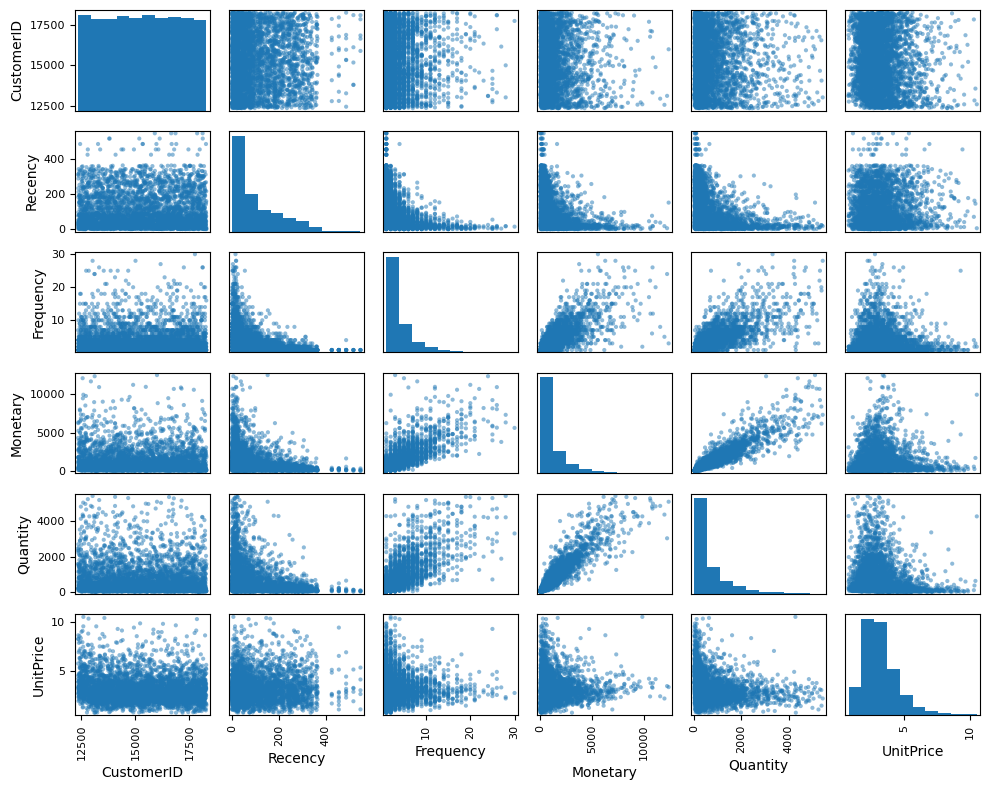

In [36]:
pd.plotting.scatter_matrix(rfm, figsize=(10,8))
plt.tight_layout()
plt.show()


In [37]:
# Create Bins

# Example: Recency bins (in days)
recency_bins = [0, 30, 90, rfm['Recency'].max()]   # 0-30: Recent, 31-90: Medium, 91+: Old
recency_labels = ['Recent:0-30', 'Medium:31-90', 'Old:91+']
rfm['Recency_cat'] = pd.cut(rfm['Recency'], bins=recency_bins, labels=recency_labels, include_lowest=True)

# Frequency bins
frequency_bins = [0, 2, 5, rfm['Frequency'].max()]  # 0-2: Low, 3-5: Medium, 6+: High
frequency_labels = ['Low:0-2', 'Medium:3-5', 'High:6+']
rfm['Frequency_cat'] = pd.cut(rfm['Frequency'], bins=frequency_bins, labels=frequency_labels, include_lowest=True)

# Monetary bins
monetary_bins = [0, 500, 2000, rfm['Monetary'].max()]  # 0-500:Low, 500-2000: Medium, 2000: high
monetary_labels = ['Low:0-500', 'Medium:500-2000', 'High:2000+']
rfm['Monetary_cat'] = pd.cut(rfm['Monetary'], bins=monetary_bins, labels=monetary_labels, include_lowest=True)


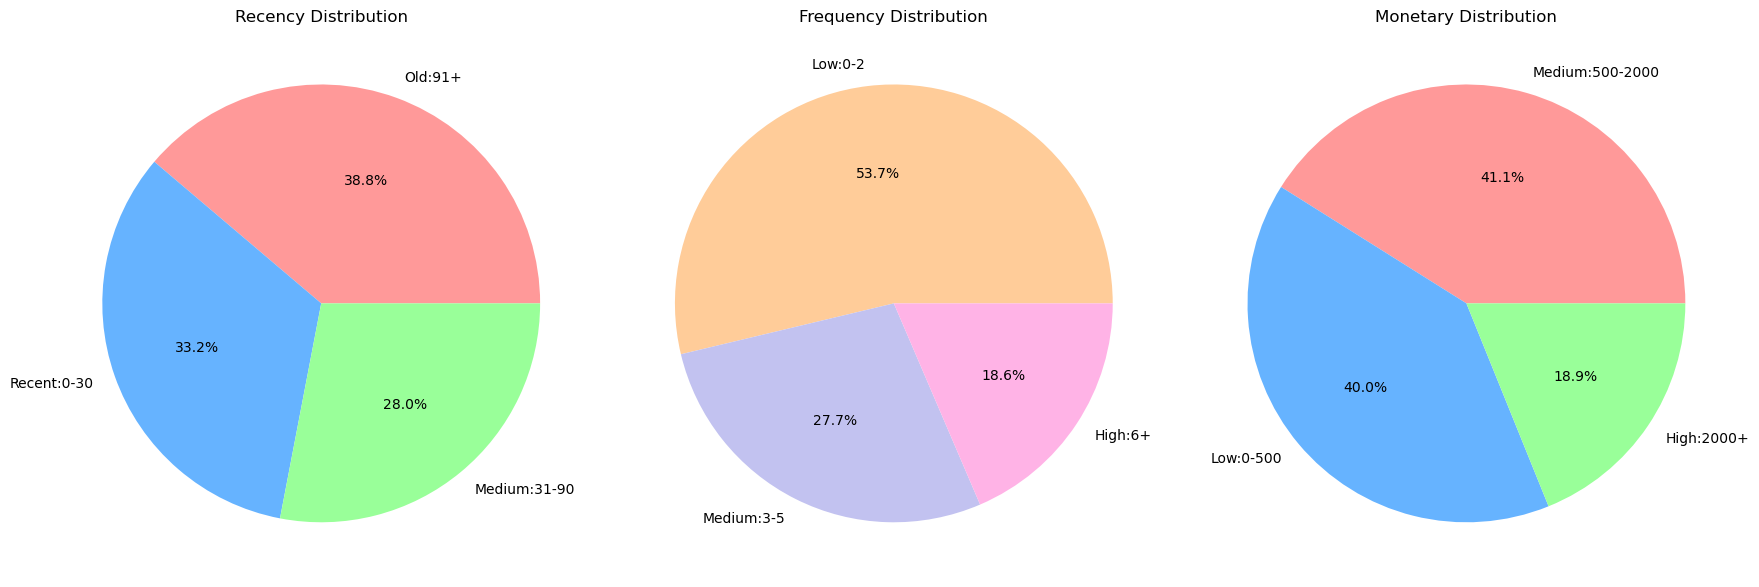

In [38]:

# Plotting Pie Charts
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# Recency Pie
rfm['Recency_cat'].value_counts().plot.pie(
    autopct='%1.1f%%', ax=axes[0], colors=['#ff9999','#66b3ff','#99ff99'])
axes[0].set_title('Recency Distribution')
axes[0].set_ylabel('')

# Frequency Pie
rfm['Frequency_cat'].value_counts().plot.pie(
    autopct='%1.1f%%', ax=axes[1], colors=['#ffcc99','#c2c2f0','#ffb3e6'])
axes[1].set_title('Frequency Distribution')
axes[1].set_ylabel('')

# Monetary Pie
rfm['Monetary_cat'].value_counts().plot.pie(
    autopct='%1.1f%%', ax=axes[2], colors=['#ff9999','#66b3ff','#99ff99'])
axes[2].set_title('Monetary Distribution')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()
 # 0-30: Recent, 31-90: Medium, 91+: Old
# 0-2: Low, 3-5: Medium, 6+: High
# 0-500:Low, 500-2000: Medium, 2000+: high

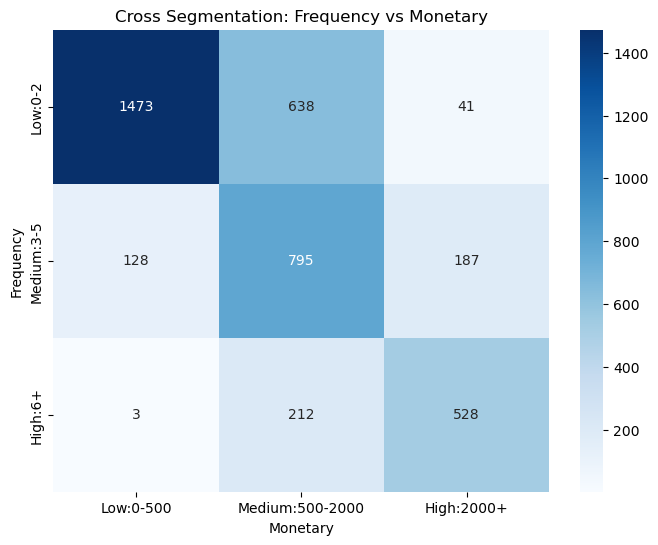

In [39]:

cross = pd.crosstab(rfm['Frequency_cat'], rfm['Monetary_cat'])

plt.figure(figsize=(8,6))
sns.heatmap(cross, annot=True, fmt="d", cmap="Blues")
plt.title("Cross Segmentation: Frequency vs Monetary")
plt.xlabel("Monetary")
plt.ylabel("Frequency")
plt.show()

## K-Means

<div style="background:#ffe5e8; padding:15px; border-radius:10px; font-size:18px;">

### ⭐ KMeans – Baseline & Business-Friendly Segmentation
KMeans is widely used for customer segmentation because it is fast, stable, and produces clean cluster separation. It serves as a strong baseline model for understanding differences in Recency, Frequency, and Monetary behavior.

I used it to generate simple and easy-to-explain clusters that business teams can quickly grasp. KMeans provides a straightforward first version of customer grouping, making it ideal for initial segmentation.

From this model, I expected clear and interpretable segments such as high-value customers, discount-seekers, near-churn customers, and occasional buyers. It also gives a reference point to compare more advanced clustering algorithms.

</div>


In [40]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                              # Frequency
    'TotalPrice': 'sum',                                 # Monetary
    'Quantity': 'sum',                                   # Total quantity purchased
    'UnitPrice': 'mean'                                  # Average unit price
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Quantity', 'UnitPrice']

for col in ['Recency', 'Frequency', 'Monetary', 'Quantity', 'UnitPrice']:
     lower = rfm[col].quantile(0.01)
     upper = rfm[col].quantile(0.99)
     rfm = rfm[(rfm[col] >= lower) & (rfm[col] <= upper)]

rfm_model = rfm[['Recency', 'Frequency', 'Monetary']].copy()


rfm_model['Recency'] = rfm_model['Recency'].astype(int)
rfm_model['Frequency'] = rfm_model['Frequency'].astype(int)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_model)

#KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Mapping clusters → segments
segment_map = {
    3: "Low-Value / One-Time Buyers",
    0: "Potential Loyalists",
    2: "Champions",
    1: "Loyal Customers" 
}
rfm['Segment'] = rfm['Cluster'].map(segment_map)

# Segment summary
segment_summary = rfm.groupby("Segment")[['Recency','Frequency','Monetary']].mean().round()
print(segment_summary)
print("")

segment_counts = rfm['Segment'].value_counts()

print(segment_counts)


                             Recency  Frequency  Monetary
Segment                                                  
Champions                       23.0       15.0    6082.0
Low-Value / One-Time Buyers    247.0        2.0     468.0
Loyal Customers                 40.0        7.0    2582.0
Potential Loyalists             56.0        2.0     678.0

Segment
Potential Loyalists            1998
Low-Value / One-Time Buyers    1038
Loyal Customers                 775
Champions                       194
Name: count, dtype: int64


In [41]:
rfm.head(21)

,CustomerID,Recency,Frequency,Monetary,Quantity,UnitPrice,Cluster,Segment
1,12347.0,41,7,4310.00,2458,2.644011,1,Loyal Customers
2,12348.0,77,4,1797.24,2341,5.764839,0,Potential Loyalists
3,12349.0,20,1,1757.55,631,8.289041,0,Potential Loyalists
4,12350.0,312,1,334.40,197,3.841176,3,Low-Value / One-Time Buyers
7,12354.0,234,1,1079.40,530,4.503793,3,Low-Value / One-Time Buyers
8,12355.0,97,1,459.40,240,4.203846,0,Potential Loyalists
9,12356.0,24,3,2811.43,1591,3.201186,1,Loyal Customers
10,12357.0,183,1,6207.67,2708,3.348626,1,Loyal Customers
11,12358.0,4,2,1168.06,248,8.274211,0,Potential Loyalists
12,12359.0,10,4,6310.03,1609,8.664531,1,Loyal Customers


In [42]:
#                              Recency  Frequency  Monetary
# Segment                                                  
# Champions                       25.0       11.0    4734.0
# Low-Value / One-Time Buyers    175.0        1.0     296.0
# Loyal Customers                106.0        4.0    1690.0
# Potential Loyalists             34.0        3.0     825.0

# Segment                                                  
# Champions                       23.0       10.0    4096.0
# Low-Value / One-Time Buyers    173.0        1.0     300.0
# Loyal Customers                 34.0        3.0     842.0
# Potential Loyalists            116.0        4.0    1645.0

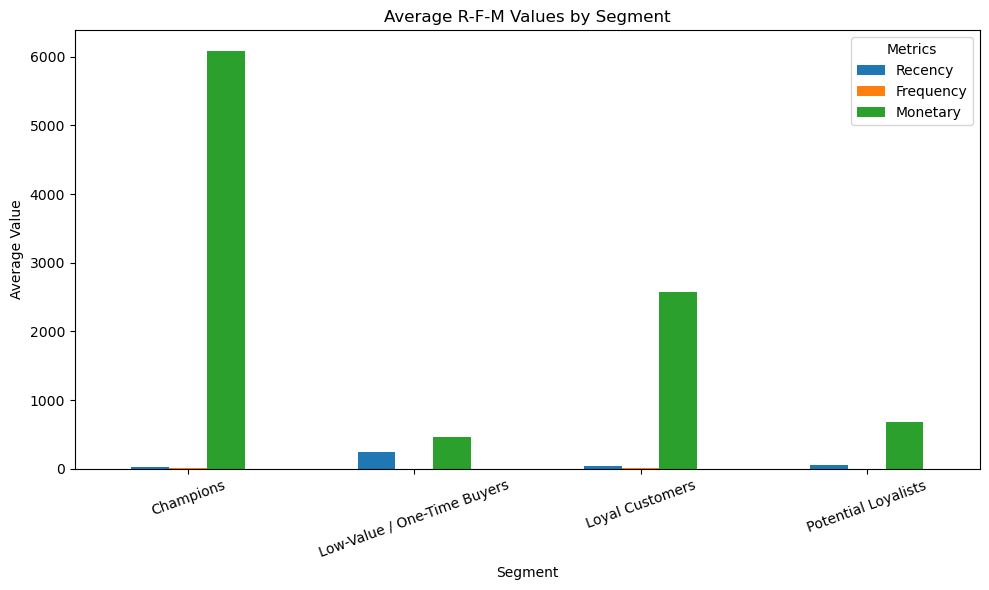

In [43]:
segment_summary = rfm.groupby("Segment")[['Recency','Frequency','Monetary']].mean().round(2)

segment_summary.plot(kind='bar', figsize=(10,6))
plt.title("Average R-F-M Values by Segment")
plt.xlabel("Segment")
plt.ylabel("Average Value")
plt.xticks(rotation=20)
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


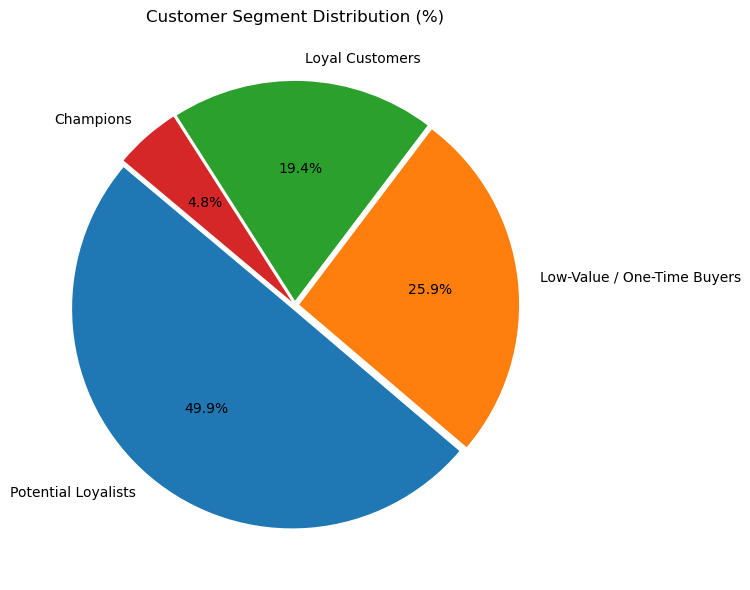

In [44]:

# Calculate percentage distribution
segment_percent = rfm['Segment'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(
    segment_percent,
    labels=segment_percent.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=[0.02]*len(segment_percent),   # Slight separation    
   # shadow=True
)

plt.title("Customer Segment Distribution (%)")
plt.tight_layout()
plt.show()


In [45]:
segment_revenue = rfm.groupby("Segment")['Monetary'].sum().sort_values(ascending=False)
print(segment_revenue)
segment_stats = rfm['Segment'].value_counts(normalize=False).to_frame('Count')
segment_stats['Percentage'] = (rfm['Segment'].value_counts(normalize=True) * 100).round(2)

print(segment_stats)


Segment
Loyal Customers                2000798.690
Potential Loyalists            1355153.473
Champions                      1179824.120
Low-Value / One-Time Buyers     485667.371
Name: Monetary, dtype: float64
                             Count  Percentage
Segment                                       
Potential Loyalists           1998       49.89
Low-Value / One-Time Buyers   1038       25.92
Loyal Customers                775       19.35
Champions                      194        4.84


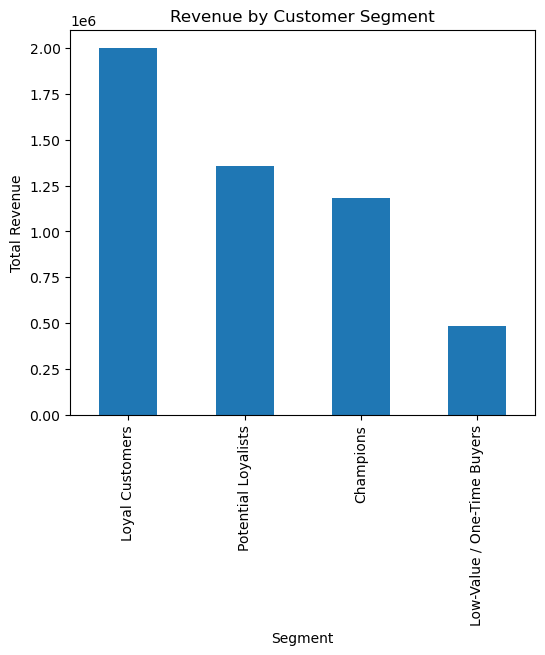

In [46]:
segment_revenue.plot(kind='bar', figsize=(6,5), title="Revenue by Customer Segment")
plt.ylabel("Total Revenue")
plt.show()


### GMM

<div style="background:#ffe5e8; padding:15px; border-radius:10px; font-size:18px;">

### ⭐ Gaussian Mixture Model (GMM) – To Handle Overlapping Customer Behaviors
Customer behavior often overlaps, and GMM captures this reality by assigning probabilities instead of forcing customers into a single group. This adds flexibility beyond KMeans, especially in RFM data where boundaries are not always sharp.

I used GMM to understand customers showing mixed characteristics, such as a high-frequency but low-monetary buyer who may belong to multiple segments. GMM reveals these soft boundaries and provides nuanced segmentation.

I expected GMM to deliver more flexible clusters, detect ambiguous customers, and create smoother boundaries where RFM clusters do not form perfect circles.

</div>


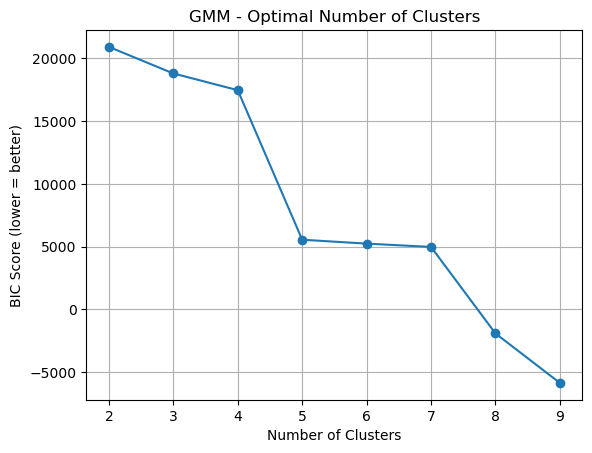

In [47]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                              # Frequency
    'TotalPrice': 'sum',                                 # Monetary
    'Quantity': 'sum',                                   # Total quantity purchased
    'UnitPrice': 'mean'                                  # Average unit price
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Quantity', 'UnitPrice']


for col in ['Recency', 'Frequency', 'Monetary', 'Quantity', 'UnitPrice']:
     lower = rfm[col].quantile(0.01)
     upper = rfm[col].quantile(0.99)
     rfm = rfm[(rfm[col] >= lower) & (rfm[col] <= upper)]


from sklearn.mixture import GaussianMixture
n_components = np.arange(2, 10)
bics = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(rfm_scaled)
    bics.append(gmm.bic(rfm_scaled))

plt.plot(n_components, bics, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("BIC Score (lower = better)")
plt.title("GMM - Optimal Number of Clusters")
plt.grid(True)
plt.show()

In [161]:
gmm = GaussianMixture(
    n_components=4,
    covariance_type='full',
    random_state=42
)

rfm['Cluster'] = gmm.fit_predict(rfm_scaled)


segment_map = {
    3: "Low-Value / One-Time Buyers",
    0: "Loyal Customers",
    2: "Champions",
    1: "Potential Loyalists" 
}
rfm['Segment'] = rfm['Cluster'].map(segment_map)

# Segment summary
segment_summary = rfm.groupby("Segment")[['Recency','Frequency','Monetary']].mean().round()
print(segment_summary)


segment_counts = rfm['Segment'].value_counts()

print(segment_counts)


                             Recency  Frequency  Monetary
Segment                                                  
Champions                       23.0       10.0    4096.0
Low-Value / One-Time Buyers    173.0        1.0     300.0
Loyal Customers                 34.0        3.0     842.0
Potential Loyalists            116.0        4.0    1645.0
Segment
Low-Value / One-Time Buyers    1481
Loyal Customers                1137
Potential Loyalists             841
Champions                       546
Name: count, dtype: int64


In [162]:
rfm.head(21)

,CustomerID,Recency,Frequency,Monetary,Quantity,UnitPrice,Cluster,Segment
1,12347.0,41,7,4310.00,2458,2.644011,2,Champions
2,12348.0,77,4,1797.24,2341,5.764839,1,Potential Loyalists
3,12349.0,20,1,1757.55,631,8.289041,2,Champions
4,12350.0,312,1,334.40,197,3.841176,3,Low-Value / One-Time Buyers
7,12354.0,234,1,1079.40,530,4.503793,1,Potential Loyalists
8,12355.0,97,1,459.40,240,4.203846,3,Low-Value / One-Time Buyers
9,12356.0,24,3,2811.43,1591,3.201186,2,Champions
10,12357.0,183,1,6207.67,2708,3.348626,1,Potential Loyalists
11,12358.0,4,2,1168.06,248,8.274211,0,Loyal Customers
12,12359.0,10,4,6310.03,1609,8.664531,2,Champions


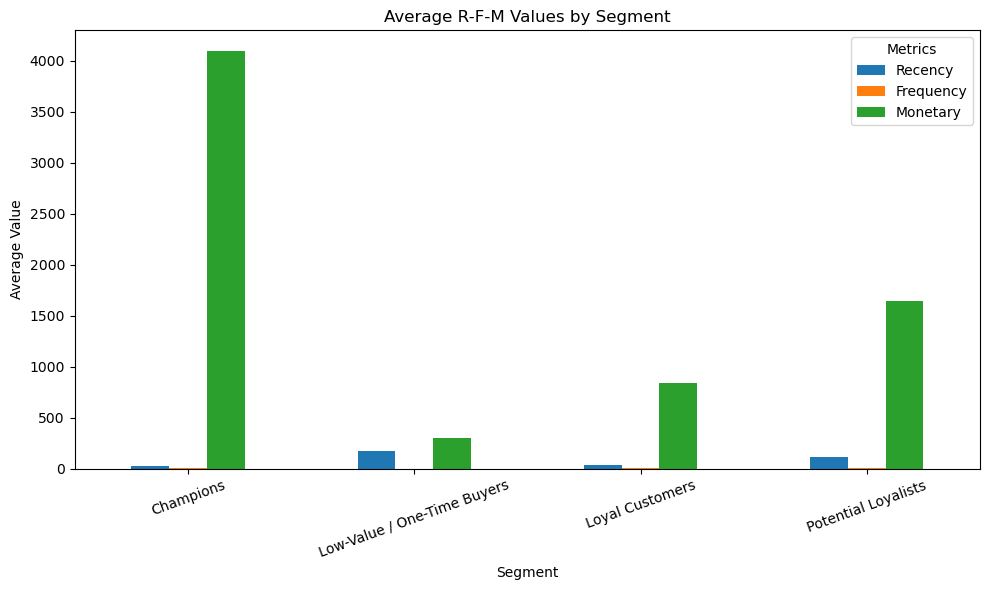

In [169]:
segment_summary = rfm.groupby("Segment")[['Recency','Frequency','Monetary']].mean().round(2)

segment_summary.plot(kind='bar', figsize=(10,6))
plt.title("Average R-F-M Values by Segment")
plt.xlabel("Segment")
plt.ylabel("Average Value")
plt.xticks(rotation=20)
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

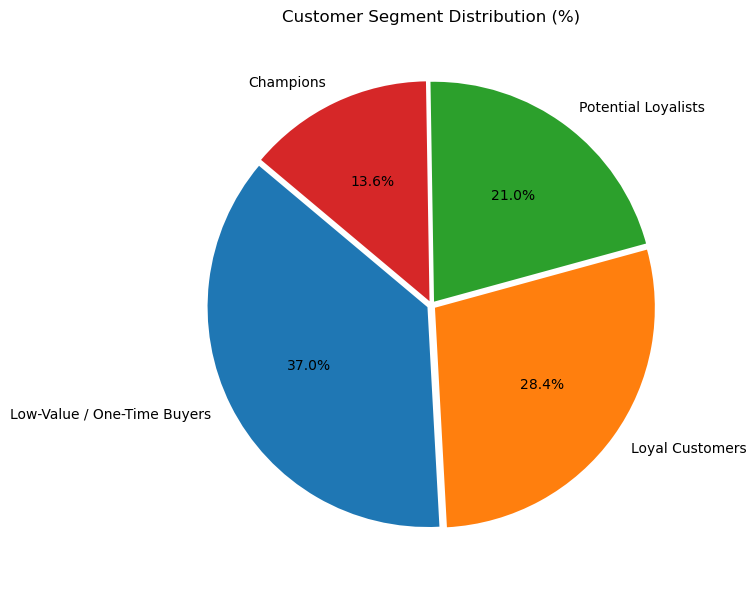

In [167]:
# Calculate percentage distribution
segment_percent = rfm['Segment'].value_counts(normalize=True) * 100

plt.figure(figsize=(9, 6))
plt.pie(
    segment_percent,
    labels=segment_percent.index,
    autopct='%1.1f%%',

    startangle=140,
    explode=[0.02]*len(segment_percent),   # Slight separation    
   # shadow=True
)

plt.title("Customer Segment Distribution (%)")
plt.tight_layout()
plt.show()

Segment
Champions                      2236294.680
Potential Loyalists            1383602.032
Loyal Customers                 956916.291
Low-Value / One-Time Buyers     444630.651
Name: Monetary, dtype: float64
                             Count  Percentage
Segment                                       
Low-Value / One-Time Buyers   1481       36.98
Loyal Customers               1137       28.39
Potential Loyalists            841       21.00
Champions                      546       13.63


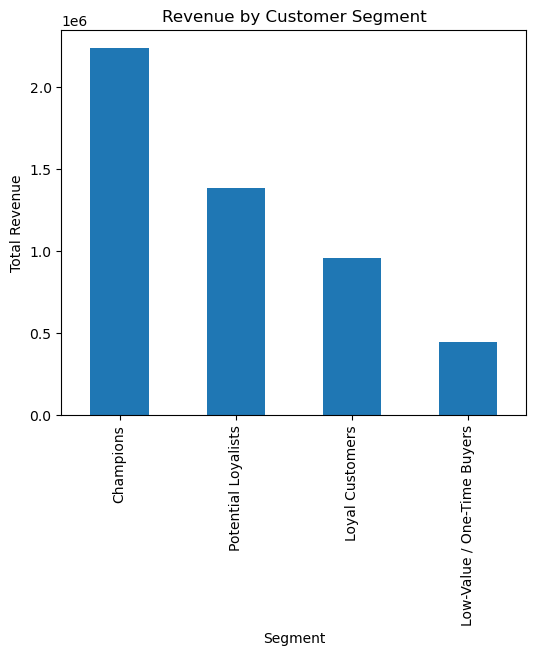

In [168]:
segment_revenue = rfm.groupby("Segment")['Monetary'].sum().sort_values(ascending=False)
print(segment_revenue)
segment_stats = rfm['Segment'].value_counts(normalize=False).to_frame('Count')
segment_stats['Percentage'] = (rfm['Segment'].value_counts(normalize=True) * 100).round(2)

print(segment_stats)

segment_revenue.plot(kind='bar', figsize=(6,5), title="Revenue by Customer Segment")
plt.ylabel("Total Revenue")
plt.show()

In [ ]:
# # Calculate segment percentages
# segment_percent = rfm['Segment'].value_counts(normalize=True) * 100

# # Prepare values
# sizes = segment_percent.values
# labels = [f"{seg}\n{pct:.1f}%" for seg, pct in segment_percent.items()]

# # Plot treemap
# plt.figure(figsize=(7, 6))
# squarify.plot(
#     sizes=sizes,
#     label=labels,
#     color=['#ff9999','#66b3ff','#99ff99','#ffcc99'],  # nice colors
#     edgecolor="white",
#     linewidth=2,
#     alpha=0.85
# )

# plt.title("Customer Segment Distribution (Treemap)", fontsize=16)
# plt.axis('off')
# plt.tight_layout()
# plt.show()

## Spectural Clustering

<div style="background:#ffe5e8; padding:15px; border-radius:15px; font-size:18px;">

### ⭐ Spectral Clustering – Capturing Complex, Non-Linear Customer Patterns  
Spectral Clustering is powerful when customer behavior does not form clear or simple boundaries. Unlike KMeans, which assumes circular clusters, Spectral Clustering uses graph-based similarity to discover patterns that may be curved, irregular, or tightly intertwined.

I used Spectral Clustering to identify relationships between customers that traditional distance-based algorithms may overlook. It helps uncover subtle structures in RFM data, especially when customers naturally form clusters that are non-linear or closely connected.

I expected Spectral Clustering to reveal deeper segmentation patterns, detect clusters that KMeans or GMM may oversimplify, and provide a richer understanding of how customers group together when their behavior lies on complex structures within the data.

</div>


Silhouette Score: 0.6687441200752253


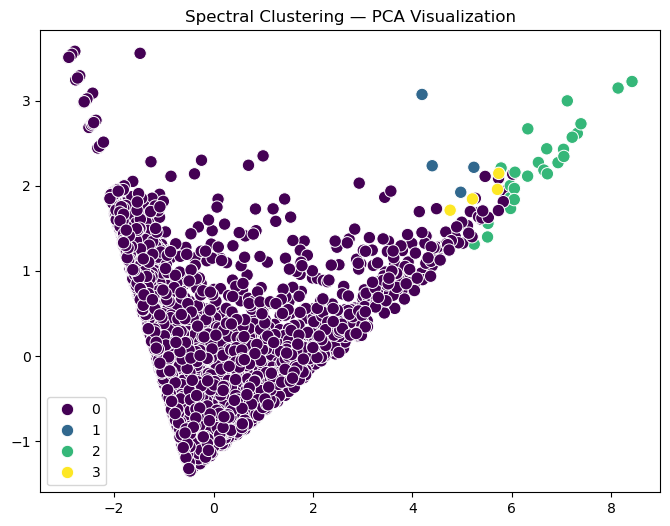

                    Recency  Frequency      Monetary
Spectral_Cluster                                    
0                 101.77235   3.466129   1191.193023
1                  71.25000   5.500000  11690.985000
2                  16.20000  24.040000   7762.809600
3                  13.40000   9.600000  10076.396000


In [ ]:
similarity_matrix = rbf_kernel(rfm_scaled, gamma=0.5)  
# you can tune gamma = 0.1–1
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_model)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                              # Frequency
    'TotalPrice': 'sum',                                 # Monetary
    'Quantity': 'sum',                                   # Total quantity purchased
    'UnitPrice': 'mean'                                  # Average unit price
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Quantity', 'UnitPrice']

for col in ['Recency', 'Frequency', 'Monetary', 'Quantity', 'UnitPrice']:
     lower = rfm[col].quantile(0.01)
     upper = rfm[col].quantile(0.99)
     rfm = rfm[(rfm[col] >= lower) & (rfm[col] <= upper)]

k = 4  # choose based on elbow/silhouette

spectral = SpectralClustering(
    n_clusters=k,
    affinity='precomputed',
    assign_labels='kmeans',
    random_state=42
)

cluster_labels = spectral.fit_predict(similarity_matrix)
rfm['Spectral_Cluster'] = cluster_labels


score = silhouette_score(rfm_scaled, cluster_labels)
print("Silhouette Score:", score)


from sklearn.decomposition import PCA

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=rfm_pca[:, 0],
    y=rfm_pca[:, 1],
    hue=cluster_labels,
    palette="viridis",
    s=80
)
plt.title("Spectral Clustering — PCA Visualization")
plt.show()


cluster_profile = rfm.groupby('Spectral_Cluster')[['Recency','Frequency','Monetary']].mean()
print(cluster_profile)

In [140]:
spectral = SpectralClustering(
    n_clusters=4,
    affinity='nearest_neighbors',
    n_neighbors=15,
    assign_labels='kmeans',
    random_state=42
)


In [141]:


# Define segment names for Spectral Clusters
spectral_segment_map = {
    0: "Low-Value / One-Time Buyers",
    1: "Potential Loyalists",
    2: "Loyal Customers",
    3: "Champions"
}

#Assign segment names
rfm['Spectral_Segment'] = rfm['Spectral_Cluster'].map(spectral_segment_map)

#Count of customers per segment
segment_count = rfm['Spectral_Segment'].value_counts()

# Total revenue per segment
segment_revenue = rfm.groupby('Spectral_Segment')['Monetary'].sum()

#Percentage of customers per segment
segment_percentage = (segment_count / len(rfm) * 100).round(2)

# Combine results into a single clean table
spectral_summary = (
    pd.concat([segment_count, segment_revenue, segment_percentage], axis=1)
      .rename(columns={0: 'Count', 'Monetary': 'Revenue', 1: 'Percentage'})
)

spectral_summary.columns = ['Count', 'Revenue', 'Percentage (%)']

spectral_summary = spectral_summary.sort_values(by='Revenue', ascending=False)

spectral_summary


,Count,Revenue,Percentage (%)
Spectral_Segment,,,
Low-Value / One-Time Buyers,3971,4730227.494,99.15
Loyal Customers,25,194070.240,0.62
Champions,5,50381.980,0.12
Potential Loyalists,4,46763.940,0.10


<div style="background:#ffe5e8; padding:18px; border-radius:10px; font-size:18px;">

## 🔗 Agglomerative Clustering

Agglomerative Clustering is a hierarchical, bottom-up segmentation method included in this project to understand how customer groups naturally form based on similarity. The method begins by treating each customer as an individual cluster and gradually merges the closest ones, creating stable and interpretable segments.

The purpose of using Agglomerative Clustering here was to observe how customers group together organically without relying on random initialization. It helps reveal the structural relationships between customers and makes it easier to interpret how low-value, medium-value, and high-value segments evolve as they merge.

Agglomerative clustering provides clean boundaries and does not force every customer into a fixed pattern, making it useful for identifying realistic business personas such as champions, potential loyalists, or low-engagement buyers.

</div>


In [1]:

# -------------------------------
# . PREPARE RFM DATA
# -------------------------------
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                              # Frequency
    'TotalPrice': 'sum',                                 # Monetary
    'Quantity': 'sum',                                   # Total quantity purchased
    'UnitPrice': 'mean'                                  # Average unit price
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Quantity', 'UnitPrice']

# -------------------------------
#  REMOVE OUTLIERS (1% - 99%)
# -------------------------------
for col in ['Recency', 'Frequency', 'Monetary', 'Quantity', 'UnitPrice']:
    low = rfm[col].quantile(0.01)
    high = rfm[col].quantile(0.99)
    rfm = rfm[(rfm[col] >= low) & (rfm[col] <= high)]

rfm = rfm.reset_index(drop=True)

# -------------------------------
#  SCALE FEATURES
# -------------------------------
features = ['Recency', 'Frequency', 'Monetary', 'Quantity', 'UnitPrice']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rfm[features])

# -------------------------------
# AGGLOMERATIVE CLUSTERING (4 CLUSTERS)
# -------------------------------
agg = AgglomerativeClustering(
    n_clusters=4,
    metric='euclidean',
    linkage='ward'
)

rfm['Cluster'] = agg.fit_predict(scaled_data)

# -------------------------------
# MAP CLUSTERS TO YOUR SEGMENTS
# -------------------------------
segment_map = {
    3: "Potential Loyalists",
    0: "Low-Value / One-Time Buyers",
    2: "Champions",
    1: "Loyal Customers" 
}

rfm['Segment'] = rfm['Cluster'].map(segment_map)

# -------------------------------
#  CLUSTER SUMMARY
# -------------------------------
print("Cluster Counts:")
print(rfm['Segment'].value_counts())

print("\nCluster Feature Means:")
print(rfm.groupby('Segment')[features].mean())

# -------------------------------
#  PCA VISUALIZATION
# -------------------------------
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca_data[:,0],
    y=pca_data[:,1],
    hue=rfm['Segment'],
    palette="tab10",
    s=60
)
plt.title("Agglomerative Clustering (4 Segments) — PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


NameError: name 'df' is not defined

<div style="background-color:#FFE5E8; padding:18px; border-radius:10px;">

## **Business Operations Analysis: Product & Sales Insights**

After completing all clustering algorithms, this section focuses on analysing the dataset from a business operations perspective — specifically product performance and sales behaviour.  
The idea is to connect customer segmentation with real business outcomes.

This analysis helps reveal which products contribute most to revenue, how sales are distributed across categories, and whether the customer clusters you identified show different buying patterns. By doing this step, we ensure that the clustering results translate into actual business insights that support decision-making.

</div>


In [142]:
# Create frequency groups
rfm['Freq_Group'] = pd.cut(
    rfm['Frequency'],
    bins=[0, 2, 5, 10, 20, 1000],
    labels=['Very Low (1-2)', 'Low (3-5)', 'Medium (6-10)', 'High (11-20)', 'Super High (20+)']
)


In [143]:
# rfm['Freq_Group'] = pd.cut(
#     rfm['Frequency'],
#     bins=[0, 3, 7, rfm['Frequency'].max()],
#     labels=['Low (1-3)', 'Medium (4-7)', 'High (8+)'],
#     include_lowest=True
# )


In [144]:
freq_revenue = rfm.groupby("Freq_Group")['Monetary'].sum().sort_values(ascending=False)
print(freq_revenue)


Freq_Group
Low (3-5)           1489664.242
Medium (6-10)       1335541.100
Very Low (1-2)      1056668.262
High (11-20)         953497.560
Super High (20+)     186072.490
Name: Monetary, dtype: float64


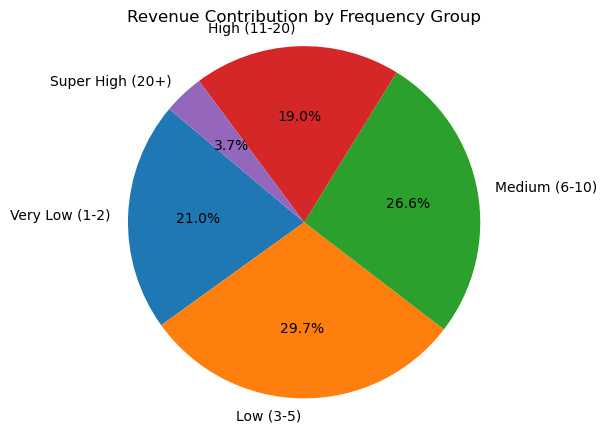

In [145]:
# Revenue by Frequency Group
freq_revenue = rfm.groupby("Freq_Group")["Monetary"].sum()

# Values and labels
sizes = freq_revenue.values
labels = [f"{group}\n{value:.2f}" for group, value in freq_revenue.items()]

freq_revenue = rfm.groupby("Freq_Group")["Monetary"].sum()

plt.figure(figsize=(5, 5))
plt.pie(freq_revenue, labels=freq_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title("Revenue Contribution by Frequency Group")
plt.axis('equal')
plt.show()


In [146]:
 #rfm.head(15)

In [147]:
df = df.dropna(subset=['Description'])
df.reset_index(drop=True, inplace=True)


In [148]:
# InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract useful time features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.to_period('M')
df['Week'] = df['InvoiceDate'].dt.to_period('W')
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()


In [149]:
monthly_sales = df.groupby('Month')['TotalPrice'].sum()

print("Monthly Sales Trend:")
print(monthly_sales)


Monthly Sales Trend:
Month
2010-01      46192.490
2010-02      47197.570
2010-03      23876.630
2010-05      31361.280
2010-06      31009.330
2010-07      53730.960
2010-08      39094.200
2010-09      38193.910
2010-10      33488.380
2010-12     226277.980
2011-01     600330.010
2011-02     485607.660
2011-03     644633.570
2011-04     601577.861
2011-05     717482.900
2011-06     687078.540
2011-07     733983.181
2011-08     607009.590
2011-09    1093319.702
2011-10     901925.950
2011-11    1039157.810
2011-12     204679.390
Freq: M, Name: TotalPrice, dtype: float64


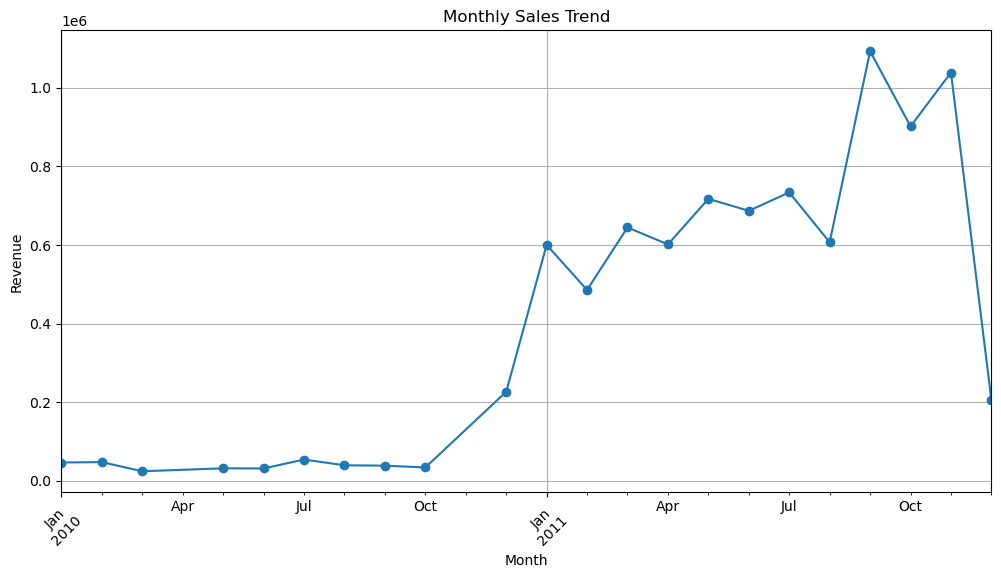

In [150]:
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


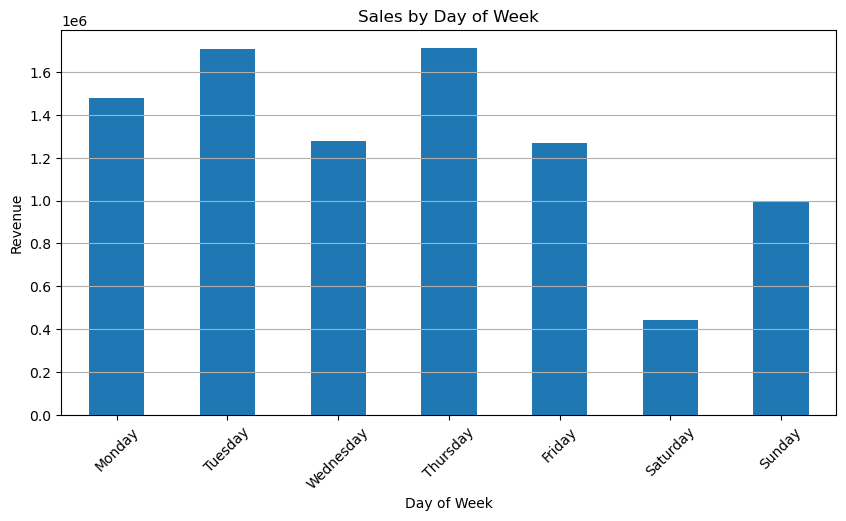

In [151]:
dow_sales = df.groupby('DayOfWeek')['TotalPrice'].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(10,5))
dow_sales.plot(kind='bar')
plt.title("Sales by Day of Week")
plt.ylabel("Revenue")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [152]:
# Revenue per product
product_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)

print("Revenue by Product:")
print(product_revenue.head(20))   # Top 20


Revenue by Product:
Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
CHILLI LIGHTS                          46265.11
PAPER CHAIN KIT 50'S CHRISTMAS         42584.13
PICNIC BASKET WICKER 60 PIECES         39619.50
BLACK RECORD COVER FRAME               39045.80
JUMBO BAG PINK POLKADOT                37254.36
DOORMAT KEEP CALM AND COME IN          35880.85
SPOTTY BUNTING                         35509.55
WOOD BLACK BOARD ANT WHITE FINISH      34414.71
SET OF 3 CAKE TINS PANTRY DESIGN       33298.30
JAM MAKING SET WITH JARS               32616.22
Name: To

In [153]:
# plt.figure(figsize=(12,6))
# product_revenue.head(10).plot(kind='bar')
# plt.title("Top 10 Best-Selling Products (Revenue)")
# plt.ylabel("Revenue")
# plt.xlabel("Product")
# plt.xticks(rotation=75)
# plt.grid(axis='y')
# plt.show()


Top 20 Best Selling Products (by Quantity):
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
PACK OF 12 LONDON TISSUES             25329
PACK OF 60 PINK PAISLEY CAKE CASES    24230
BROCADE RING PURSE                    22927
VICTORIAN GLASS HANGING T-LIGHT       22404
ASSORTED COLOURS SILK FAN             21876
RED  HARMONICA IN BOX                 20945
JUMBO BAG PINK POLKADOT               20148
SMALL POPCORN HOLDER                  18241
60 TEATIME FAIRY CAKE CASES           17664
LUNCH BAG RED RETROSPOT               17576
Name: Quantity, dtype: int64


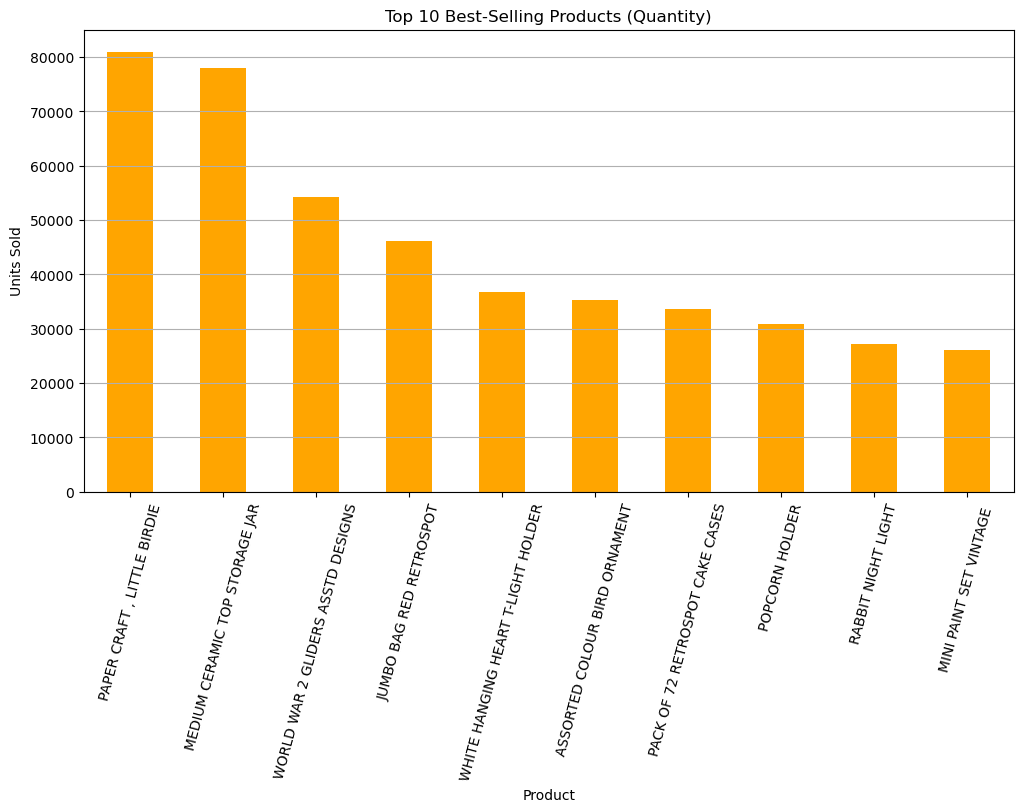

In [154]:
product_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

print("Top 20 Best Selling Products (by Quantity):")
print(product_quantity.head(20))

plt.figure(figsize=(12,6))
product_quantity.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Best-Selling Products (Quantity)")
plt.ylabel("Units Sold")
plt.xlabel("Product")
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.show()


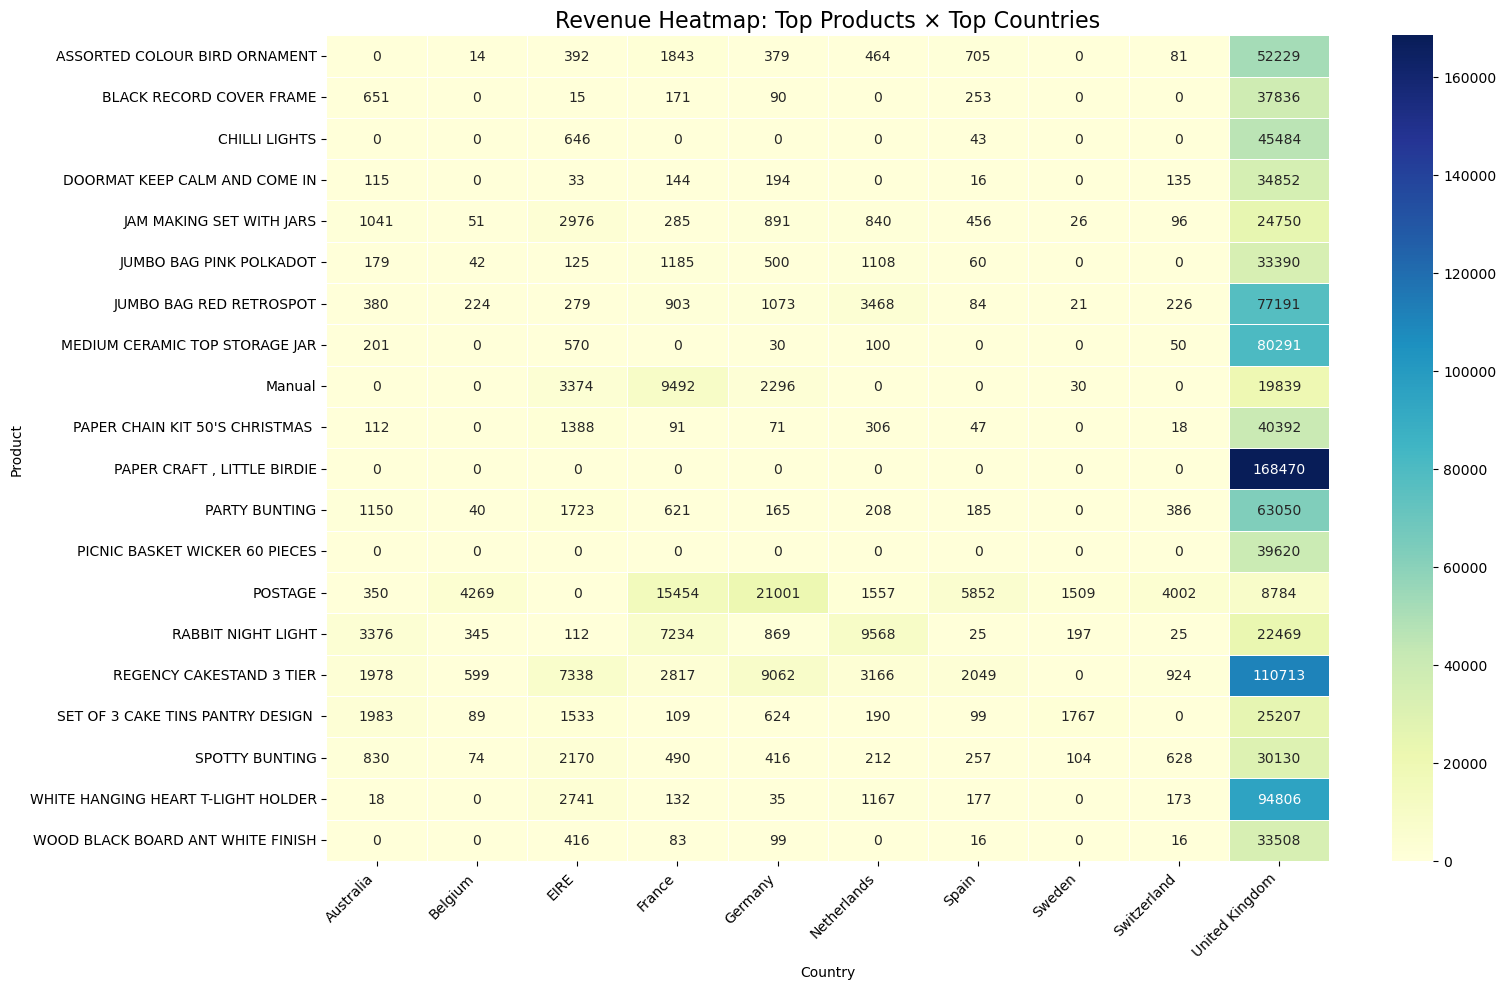

In [155]:


#  datetime and TotalPrice 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Best 20 revenue-generating products
top_products = (
    df.groupby('Description')['TotalPrice']
      .sum()
      .sort_values(ascending=False)
      .head(20)
      .index
)

# Top 10 countries by revenue
top_countries = (
    df.groupby('Country')['TotalPrice']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .index
)

#  Filter dataset
df_filtered = df[
    df['Description'].isin(top_products) &
    df['Country'].isin(top_countries)
]

# Pivot table
pivot = df_filtered.pivot_table(
    index='Description',
    columns='Country',
    values='TotalPrice',
    aggfunc='sum',
    fill_value=0
)

# Heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    pivot,
    annot=True,           # show numbers
    fmt=".0f",            # remove decimals
    cmap="YlGnBu",
    linewidths=.5
)

plt.title("Revenue Heatmap: Top Products × Top Countries", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Product")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<div style="background:#ffe5e8; padding:18px; border-radius:10px; font-size:18px;">

## 🏁 Conclusion

Although multiple algorithms were evaluated, **Gaussian Mixture Models (GMM)** delivered the most practical and business-aligned customer segmentation for this dataset.  
GMM captures soft boundaries between customer types and models the underlying distribution more accurately than distance-based methods like Agglomerative Clustering.

By using GMM, we obtained segments that reflect subtle behavioral variations in Recency, Frequency, and Monetary value—leading to richer insight into spending patterns, purchase intensity, and customer engagement. These clusters are smooth, probabilistic, and ideal for marketing teams who want flexible, data-driven customer personas.

The resulting GMM segments allow the business to:
- Identify high-value customers,
- Spot customers at risk of churn,
- Improve targeting of promotional offers,
- Strengthen retention and revenue-focused strategies.

Overall, GMM proved to be the most effective model for generating meaningful, actionable customer segments.

</div>
